<a href="https://colab.research.google.com/github/patriciacarvalhom/fuzzy/blob/main/Notebook/fuzzy_skfuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install scikit-fuzzy

In [26]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import skfuzzy as fuzzy
from skfuzzy import*
from skfuzzy import control as ctrl

In [27]:
# Definição das variáveis fuzzy
luminosidade = ctrl.Antecedent(numpy.arange(0, 1801, 1), 'luminosidade_externa')
atividade = ctrl.Antecedent(numpy.arange(0, 5.6, 0.001), 'atividade')
presenca = ctrl.Antecedent(numpy.arange(0, 1.5, 0.001), 'presenca')
seguranca = ctrl.Antecedent(numpy.arange(0, 1.5, 0.001), 'seguranca')
economia = ctrl.Antecedent(numpy.arange(0, 1.5, 0.001), 'economia')


In [28]:
# definição da variável de saída
intensidade = ctrl.Consequent(numpy.arange(0, 1801, 1), 'intensidade')

* Baixa: aproximadamente 0 a 700 lúmens
* Média: entre 600 a 1200 lúmens
* Alta: de 1100 a 1800 lúmens
[fonte da tabela base](https://www.archdaily.com.br/br/897537/como-calcular-a-intensidade-de-luz-necessaria-em-seus-ambientes)


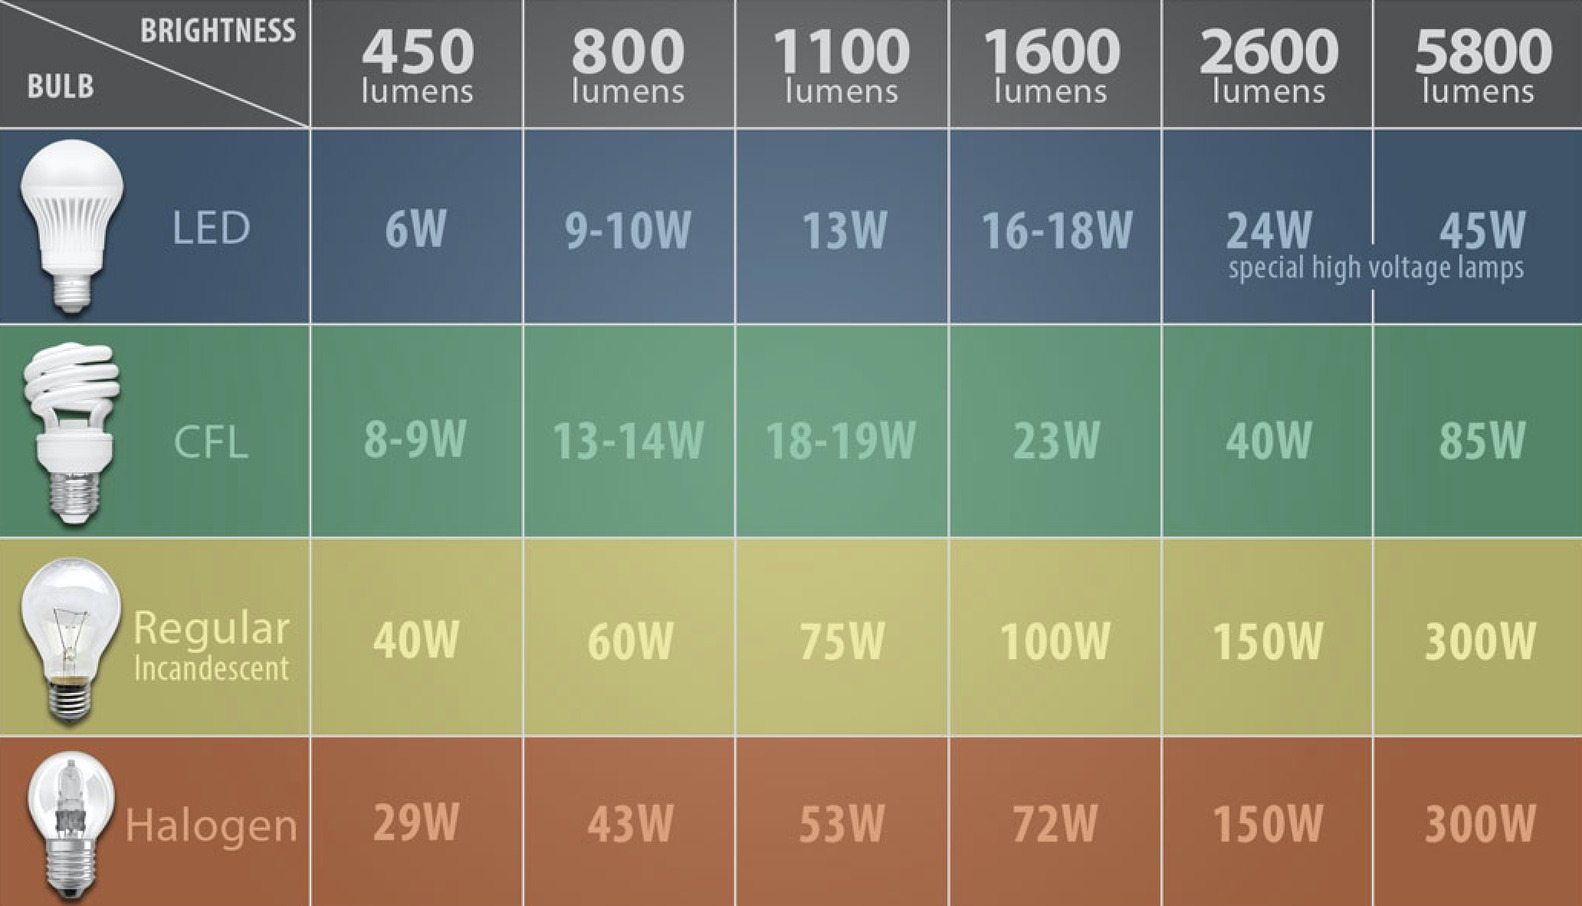

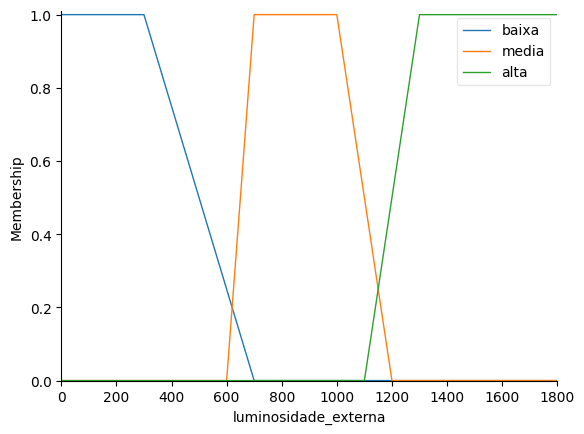

In [29]:
# Funções de pertinência para Luminosidade Externa
# MANTER TUDO TRAPEZOIDAL
luminosidade['baixa'] = fuzzy.trapmf(luminosidade.universe, [0,    0,   300,  700])
luminosidade['media'] = fuzzy.trapmf(luminosidade.universe, [600,  700, 1000, 1200])
luminosidade['alta']  = fuzzy.trapmf(luminosidade.universe, [1100, 1300, 1800, 1800])

luminosidade.view()

A função trapezoidal (trapmf) recebe quatro parâmetros, [a, b, c, d], que determinam o formato do trapézio:

1.   **a:** Início do patamar, onde a pertinência começa a aumentar a partir de zero.
* Para valores menores ou iguais a a, a pertinência é 0.
2. **b:** Início do patamar alto, onde a pertinência atinge 1.
* Entre a e b, a pertinência aumenta linearmente de 0 até 1.
3.   **c:** Final do patamar alto, onde a pertinência começa a diminuir de 1.
* Entre b e c, a pertinência permanece 1 (topo do trapézio).
4. **d:**  Final do patamar, onde a pertinência chega a 0 novamente.
* Entre c e d, a pertinência diminui linearmente de 1 até 0.
* Para valores maiores ou iguais a d, a pertinência é 0 novamente.




In [30]:
# Funções de pertinência para atividade
# Ler=1, Assistir TV=2, Dormir=3, Cozinhar=4, Trabalhar=5
# representado dessa forma para ser um singleton
#atividade['ler'] = fuzzy.trimf(atividade.universe, [0.999, 1, 1.001])
#atividade['assistir_tv'] = fuzzy.trimf(atividade.universe, [1.999, 2, 2.001])
#atividade['dormir'] = fuzzy.trimf(atividade.universe, [2.999, 3, 3.001])
#atividade['cozinhar'] = fuzzy.trimf(atividade.universe, [3.999, 4, 4.001])
#atividade['trabalhar'] = fuzzy.trimf(atividade.universe, [4.999, 5, 5.001])
#atividade.view()

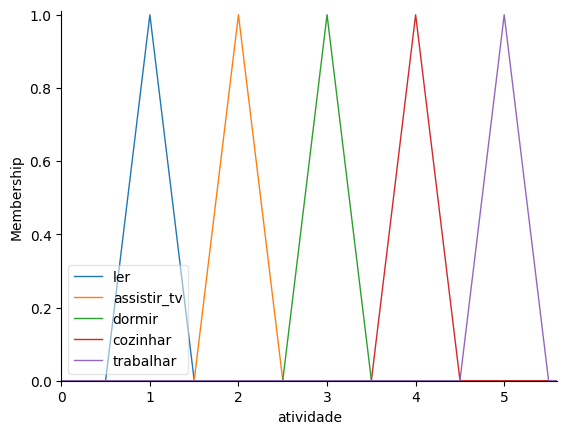

In [31]:
# Funções de pertinência para atividade
# Ler=1, Assistir TV=2, Dormir=3, Cozinhar=4, Trabalhar=5
atividade['ler'] = fuzzy.trapmf(atividade.universe, [0.5, 1, 1, 1.5])
atividade['assistir_tv'] = fuzzy.trapmf(atividade.universe, [1.5, 2, 2, 2.5])
atividade['dormir'] = fuzzy.trapmf(atividade.universe, [2.5, 3, 3, 3.5])
atividade['cozinhar'] = fuzzy.trapmf(atividade.universe, [3.5, 4, 4, 4.5])
atividade['trabalhar'] = fuzzy.trapmf(atividade.universe, [4.5, 5, 5, 5.5])
atividade.view()

In [32]:
# Presença (0 = ausente, 1 = presente)
# representado dessa forma para ser um singleton

#presenca['ausente'] = fuzzy.trimf(presenca.universe, [0.1, 0.101, 0.102])
#presenca['presente'] = fuzzy.trimf(presenca.universe, [0.998,0.999,1])
#presenca.view()

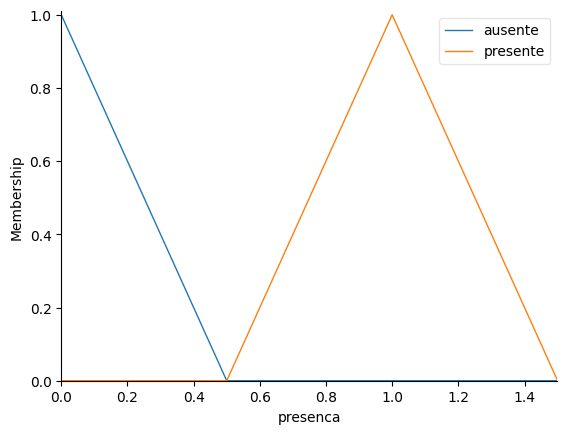

In [33]:
# Presença (0 = ausente, 1 = presente)

presenca['ausente']  = fuzzy.trimf(presenca.universe, [-0.5, 0, 0.5])
presenca['presente'] = fuzzy.trimf(presenca.universe, [0.5, 1, 1.5])
presenca.view()

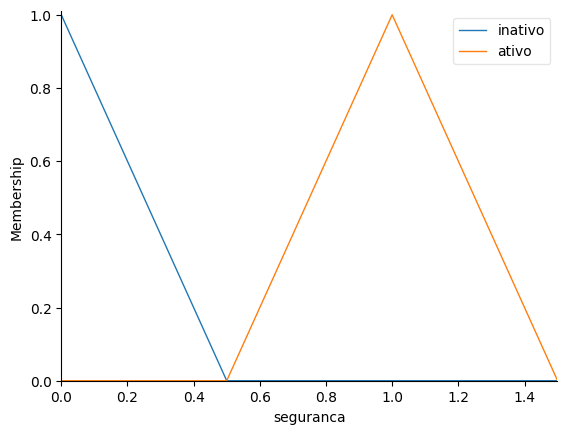

In [34]:
# Modo de segurança (0 = inativo, 1 = ativo)

seguranca['inativo']  = fuzzy.trimf(seguranca.universe, [-0.5, 0, 0.5])
seguranca['ativo'] = fuzzy.trimf(seguranca.universe, [0.5, 1, 1.5])
seguranca.view()

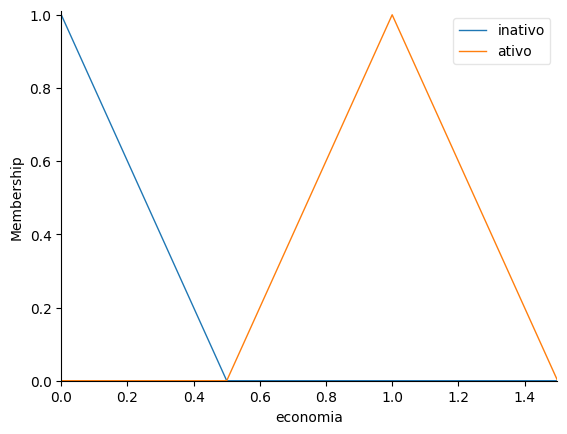

In [35]:
# Modo de economia de energia (0 = inativo, 1 = ativo)

economia['inativo']  = fuzzy.trimf(economia.universe, [-0.5, 0, 0.5])
economia['ativo'] = fuzzy.trimf(economia.universe, [0.5, 1, 1.5])
economia.view()

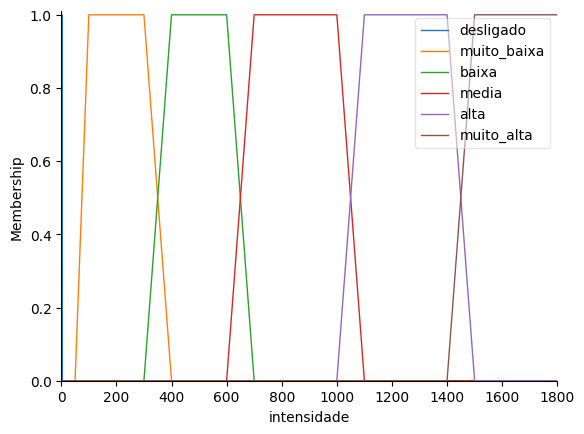

In [36]:
# Intensidade da iluminação

intensidade['desligado'] = fuzzy.trimf(intensidade.universe, [1, 2, 3])
# desligado foi definido dessa forma para representar um singleton
intensidade['muito_baixa'] = fuzzy.trapmf(intensidade.universe, [50, 100, 300, 400])
intensidade['baixa']       = fuzzy.trapmf(intensidade.universe, [300, 400, 600, 700])
intensidade['media']       = fuzzy.trapmf(intensidade.universe, [600, 700, 1000, 1100])
intensidade['alta']        = fuzzy.trapmf(intensidade.universe, [1000, 1100, 1400, 1500])
intensidade['muito_alta']  = fuzzy.trapmf(intensidade.universe, [1400, 1500, 1800, 1800])
intensidade.view()

In [37]:
# Regras

regras = [
    ctrl.Rule(seguranca['ativo'] & presenca['ausente'], intensidade['baixa']),
    ctrl.Rule(seguranca['inativo'] & presenca['ausente'], intensidade['desligado']),
    ctrl.Rule(seguranca['inativo'] &  atividade['dormir'], intensidade['desligado']),
    ctrl.Rule(seguranca['ativo'] & atividade['dormir'], intensidade['baixa']),
    # modo assistir tv
    ctrl.Rule(economia['inativo'] & atividade['assistir_tv'] & luminosidade['baixa'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(economia['inativo'] & atividade['assistir_tv'] & luminosidade['media'] & presenca['presente'], intensidade['baixa']),
    ctrl.Rule(economia['inativo'] & atividade['assistir_tv'] & luminosidade['alta'] & presenca['presente'], intensidade['muito_baixa']),
    ctrl.Rule(economia['ativo'] & atividade['assistir_tv'] & luminosidade['alta'] & presenca['presente'], intensidade['desligado']),
    # modo ler
    ctrl.Rule(economia['inativo'] & atividade['ler'] & luminosidade['baixa'] & presenca['presente'], intensidade['muito_alta']),
    ctrl.Rule(economia['inativo'] & atividade['ler'] & luminosidade['media'] & presenca['presente'], intensidade['alta']),
    ctrl.Rule(economia['inativo'] & atividade['ler'] & luminosidade['alta'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(economia['ativo'] & atividade['ler'] & luminosidade['alta'] & presenca['presente'], intensidade['muito_baixa']),
    # modo trabalhar
    ctrl.Rule(economia['inativo'] & atividade['trabalhar'] & luminosidade['baixa'] & presenca['presente'], intensidade['muito_alta']),
    ctrl.Rule(economia['inativo'] & atividade['trabalhar'] & luminosidade['media'] & presenca['presente'], intensidade['alta']),
    ctrl.Rule(economia['inativo'] & atividade['trabalhar'] & luminosidade['alta'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(economia['ativo'] & atividade['trabalhar'] & luminosidade['alta'] & presenca['presente'], intensidade['muito_baixa']),
    # modo cozinhar
    ctrl.Rule(economia['inativo'] & atividade['cozinhar'] & luminosidade['baixa'] & presenca['presente'], intensidade['alta']),
    ctrl.Rule(economia['inativo'] & atividade['cozinhar'] & luminosidade['media'] & presenca['presente'], intensidade['media']),
    ctrl.Rule(economia['inativo'] & atividade['cozinhar'] & luminosidade['alta'] & presenca['presente'], intensidade['baixa']),
    ctrl.Rule(economia['ativo'] & atividade['cozinhar'] & luminosidade['alta'] & presenca['presente'], intensidade['muito_baixa']),
]

In [38]:
# Sistema de controle fuzzy
sistema = ctrl.ControlSystem(regras)
simulador = ctrl.ControlSystemSimulation(sistema)

In [39]:
# Exemplo de uso
simulador.input['seguranca'] = 0
simulador.input['economia'] = 0
simulador.input['luminosidade_externa'] = 150
simulador.input['atividade'] = 1
simulador.input['presenca'] = 1

In [40]:
#try:
 #   simulador.compute()
  #  print(f"Intensidade da iluminação recomendada: {simulador.output['intensidade']:.2f}")
#except KeyError as e:
 #   print(f"Erro: {e}")
  #  print("Nenhuma regra foi ativada. Verifique os valores de entrada.")

Intensidade da iluminação recomendada: 1623.81


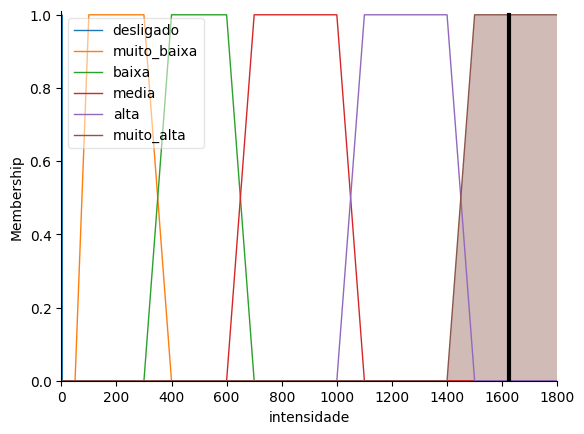

In [41]:
# Computar saída
simulador.compute()
print(f"Intensidade da iluminação recomendada: {simulador.output['intensidade']:.2f}")
# resultado da defuzzificação e onde o valor nítido obtido se encontra no universo da saída
intensidade.view(sim=simulador)

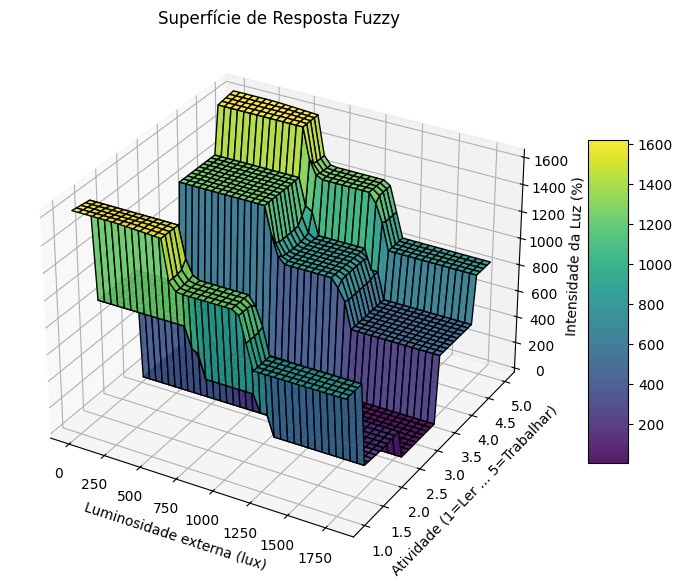

In [42]:
#superficie de resposta 3d inferência
# pesquisar se dá pra usar essas simulações pro desvio padrão
# Eixo x: luminosidade, eixo y: atividade, z: intensidade da luz
num = 40  # resolução
luminosidade_range = numpy.linspace(0, 1800, num)
atividade_range = numpy.linspace(1, 5, num)
# 1=ler,5=trabalhar
X, Y = numpy.meshgrid(luminosidade_range, atividade_range)
Z = numpy.zeros_like(X)

# Fixando presença como 'presente' em todas as simulações

for i in range(num):
    for j in range(num):
        simulador = ctrl.ControlSystemSimulation(sistema)
        simulador.input['luminosidade_externa'] = X[i, j]
        simulador.input['atividade'] = Y[i, j]
        simulador.input['presenca'] = 1
        simulador.input['seguranca'] = 0
        simulador.input['economia'] = 0
        try:
            simulador.compute()
            Z[i, j] = simulador.output['intensidade']
        except KeyError:
            Z[i, j] = numpy.nan


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_xlabel('Luminosidade externa (lux)')
ax.set_ylabel('Atividade (1=Ler ... 5=Trabalhar)')
ax.set_zlabel('Intensidade da Luz (%)')
ax.set_title('Superfície de Resposta Fuzzy')
fig.colorbar(surf, shrink=0.6, aspect=8)
plt.show()



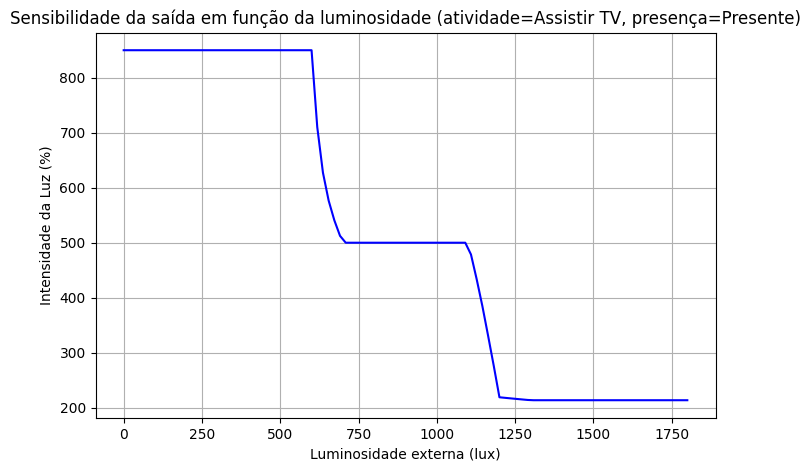

In [43]:
# CURVA DE SENSIBILIDADE (2D)
# -------------------------------
luminosidade_range = numpy.linspace(0, 1800, 100)
saida = []
atividade_fixa = 2  # Por exemplo, 2 = Assistir TV
for l in luminosidade_range:
    simulador = ctrl.ControlSystemSimulation(sistema)
    simulador.input['luminosidade_externa'] = l
    simulador.input['atividade'] = atividade_fixa
    simulador.input['presenca'] = 1
    simulador.input['seguranca'] = 0
    simulador.input['economia'] = 0
    simulador.compute()
    saida.append(simulador.output['intensidade'])

plt.figure(figsize=(8,5))
plt.plot(luminosidade_range, saida, color='b')
plt.xlabel('Luminosidade externa (lux)')
plt.ylabel('Intensidade da Luz (%)')
plt.title('Sensibilidade da saída em função da luminosidade (atividade=Assistir TV, presença=Presente)')
plt.grid(True)
plt.show()

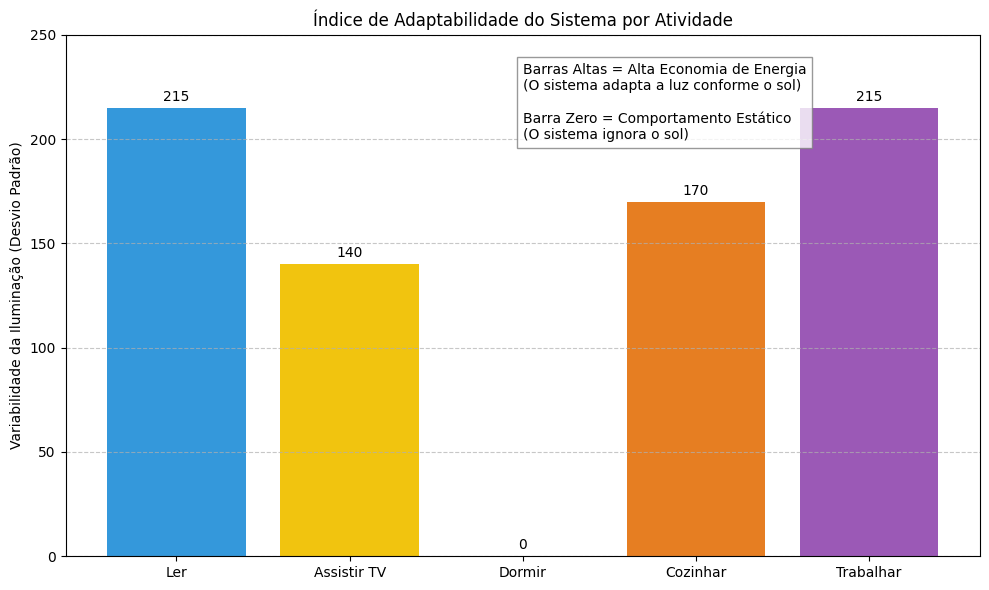

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simulados baseados na lógica das regras do seu arquivo
# Ler: Varia de Muito Alta (1600) a Média (850) -> Alta variância
# TV: Varia de Média (850) a Muito Baixa (350) -> Média variância
# Dormir: Regra fixa em Desligado (0) independente da luz externa -> Variância Zero
# Cozinhar: Varia de Alta (1250) a Baixa (650) -> Média variância
# Trabalhar: Varia de Muito Alta (1600) a Média (850) -> Alta variância

atividades = ['Ler', 'Assistir TV', 'Dormir', 'Cozinhar', 'Trabalhar']
# Estimativa do desvio padrão (variabilidade) em lúmens
desvios = [215, 140, 0, 170, 215]

fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(atividades, desvios, color=['#3498db', '#f1c40f', '#95a5a6', '#e67e22', '#9b59b6'])

# Adicionando valores
for rect in barras:
    height = rect.get_height()
    ax.annotate(f'{height}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

ax.set_ylabel('Variabilidade da Iluminação (Desvio Padrão)')
ax.set_title('Índice de Adaptabilidade do Sistema por Atividade')
ax.set_ylim(0, 250)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Explicação no gráfico
plt.text(2, 200, "Barras Altas = Alta Economia de Energia\n(O sistema adapta a luz conforme o sol)\n\nBarra Zero = Comportamento Estático\n(O sistema ignora o sol)",
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

Lúmen: medida de fluxo luminoso (luz emitida)

Lux: medida de luz distribuída numa superfície (luz recebida)

Como vamos recomendar o nível de luminosidade (mais comumente chamada claridade) ou seja, o resultado da iluminação e não a luz emitida, utiliza-se lux.  

Lux = lumen / m²

Comparando com a NBR/ISO 8995-ILUMINAÇÃO EM AMBIENTES DE TRABALHO, disponível em: [norma](https://paginapessoal.utfpr.edu.br/vilmair/instalacoes-prediais-1/normas-e-tabelas-de-dimensionamento/NBRISO_CIE8995-1.pdf/view)

atividade/lux recomendada

* salas de descanso: 100-200   
* cozinha : 500
* escritório: 500-750  
* sala de leitura: 500  


In [45]:

area_ambiente = 3  # metros quadrados

# Mapeamento: Nome da Atividade, ID na Fuzzy, Lux Mínimo NBR, Lux Máximo NBR
cenarios = [
    {"nome": "Leitura",   "id": 1, "lux_min": 500, "lux_max": 500},
    {"nome": "Descanso",  "id": 2, "lux_min": 100, "lux_max": 200},
    {"nome": "Cozinha",   "id": 4, "lux_min": 500, "lux_max": 500},
    {"nome": "Escritório","id": 5, "lux_min": 500, "lux_max": 750}
]

# Listas para armazenar dados do gráfico
nomes = []
fuzzy_lumens = []
nbr_target_lumens = [] # Média do alvo para a barra
nbr_error_min = [] # Para a barra de erro
nbr_error_max = [] # Para a barra de erro

In [46]:
# 2. Executar Simulações e Cálculos
print("--- Resultados da Simulação (Luminosidade Externa = 0) ---")

for item in cenarios:
    # Configurar entradas para o pior caso (escuro total) para ver a resposta do sistema
    simulador.input['seguranca'] = 0
    simulador.input['economia'] = 0
    simulador.input['luminosidade_externa'] = 0
    simulador.input['presenca'] = 1
    simulador.input['atividade'] = item["id"]

    # Computar Fuzzy
    try:
        simulador.compute()
        resultado_fuzzy = simulador.output['intensidade']
    except:
        resultado_fuzzy = 0

    # Cálculo NBR (Lux -> Lumens)
    target_min_lumen = item["lux_min"] * area_ambiente
    target_max_lumen = item["lux_max"] * area_ambiente
    target_avg_lumen = (target_min_lumen + target_max_lumen) / 2

    # Armazenar dados
    nomes.append(item["nome"])
    fuzzy_lumens.append(resultado_fuzzy)
    nbr_target_lumens.append(target_avg_lumen)

    # Calcular erro para as barras de desvio (matplotlib usa erro relativo ao ponto)
    nbr_error_min.append(target_avg_lumen - target_min_lumen)
    nbr_error_max.append(target_max_lumen - target_avg_lumen)

    print(f"{item['nome']}: Sistema Fuzzy = {resultado_fuzzy:.1f} lm | NBR (Alvo) = {target_min_lumen}-{target_max_lumen} lm")

--- Resultados da Simulação (Luminosidade Externa = 0) ---
Leitura: Sistema Fuzzy = 1623.8 lm | NBR (Alvo) = 1500-1500 lm
Descanso: Sistema Fuzzy = 850.0 lm | NBR (Alvo) = 300-600 lm
Cozinha: Sistema Fuzzy = 1250.0 lm | NBR (Alvo) = 1500-1500 lm
Escritório: Sistema Fuzzy = 1623.8 lm | NBR (Alvo) = 1500-2250 lm


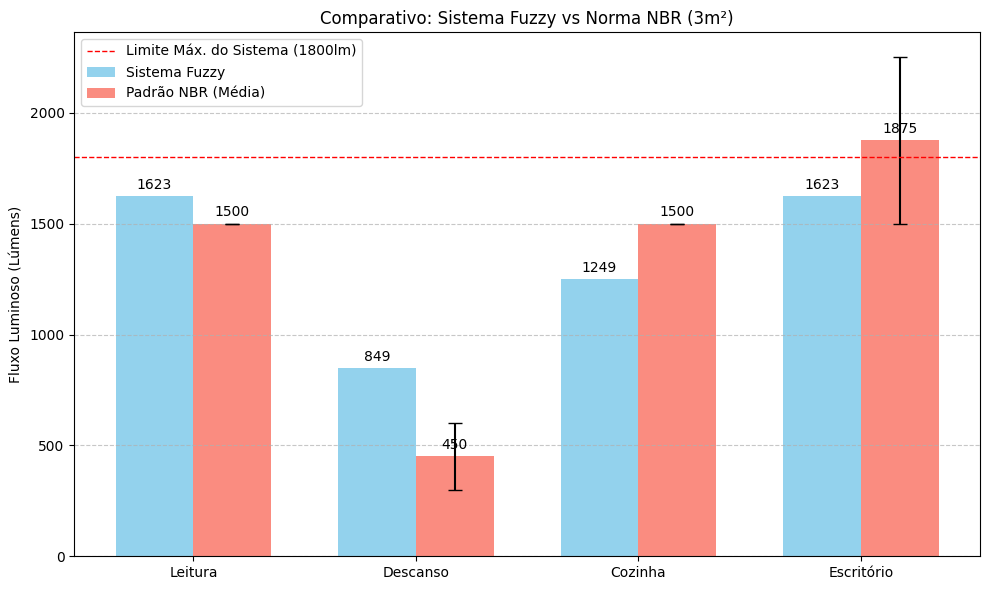

In [47]:
# 3. Plotar o Gráfico
x = numpy.arange(len(nomes))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Barra do Sistema Fuzzy
rects1 = ax.bar(x - width/2, fuzzy_lumens, width, label='Sistema Fuzzy', color='skyblue', alpha=0.9)

# Barra da Norma NBR (com barras de erro indicando o intervalo min-max)
# yerr espera formato [[erros_abaiso], [erros_acima]]
erro_formato = [nbr_error_min, nbr_error_max]
rects2 = ax.bar(x + width/2, nbr_target_lumens, width, yerr=erro_formato, label='Padrão NBR (Média)', color='salmon', capsize=5, alpha=0.9)

# Linha de limite do sistema (Seu universo vai até 1800)
plt.axhline(y=1800, color='red', linestyle='--', linewidth=1, label='Limite Máx. do Sistema (1800lm)')

# Textos e Labels
ax.set_ylabel('Fluxo Luminoso (Lúmens)')
ax.set_title(f'Comparativo: Sistema Fuzzy vs Norma NBR ({area_ambiente}m²)')
ax.set_xticks(x)
ax.set_xticklabels(nomes)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Função para adicionar labels em cima das barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()